In [1]:
from pathlib import Path
import datetime
import sys
import scipy.integrate
import random

%config InlineBackend.figure_format='retina'
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import pandas as pd

#toast
import matplotlib.font_manager as fm


mpl.rc('text', usetex=False)
#Code for using superscripts
def get_super(x):
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    super_s = "ᴬᴮᶜᴰᴱᶠᴳᴴᴵᴶᴷᴸᴹᴺᴼᴾQᴿˢᵀᵁⱽᵂˣʸᶻᵃᵇᶜᵈᵉᶠᵍʰᶦʲᵏˡᵐⁿᵒᵖ۹ʳˢᵗᵘᵛʷˣʸᶻ⁰¹²³⁴⁵⁶⁷⁸⁹⁺⁻⁼⁽⁾"
    res = x.maketrans(''.join(normal), ''.join(super_s))
    return x.translate(res)
def get_sub(x):
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    sub_s = "ₐ₈CDₑբGₕᵢⱼₖₗₘₙₒₚQᵣₛₜᵤᵥwₓᵧZₐ♭꜀ᑯₑբ₉ₕᵢⱼₖₗₘₙₒₚ૧ᵣₛₜᵤᵥwₓᵧ₂₀₁₂₃₄₅₆₇₈₉₊₋₌₍₎"
    res = x.maketrans(''.join(normal), ''.join(sub_s))
    return x.translate(res)
#Checks to make sure you are in the right folder, if this is wrong reload
import os
print(os.getcwd())




C:\Users\jdnor\Documents\PlottingNB


In [2]:
# Choose .csv data file and turn it into dataframe


colnames = ["wavenum" , "val"] #Defines the column tites for a csv without titles

file = pd.read_csv('FTIR_230824_Au@SrTiO2_CO_JDN2_10_ARGO1025mW_20min.csv', names = colnames) #,header=[0,1])
df = pd.DataFrame(file)
drifts_df = df.iloc[:] # returns whole data set
# in the original code in this cell, this wavelength series takes the first column in the original .csv file. Modify as needed, including renaming.
# assign your measurment names with detail here we will be appending them together later
wavenum = drifts_df.iloc[:, 0]
S25mW = drifts_df.iloc[:, 1]
#This list is the name as a string, the name as a variable, and whether or not you want to include the data in the plot.
datalist = [["25 mW Start",S25mW, True]]
#Change true to false for any one you want to expclude from a given plot.


# To see all columns and all rows - you can change None to 10 if you want to see less results; this includes settings info that shows up at the end
pd.set_option("display.max_rows", None, "display.max_columns", None)
# To return dataframe without settings at the end


display(df.head())
display(len(df))

#display(D_200C_A.head())
display(wavenum.head())

#Copy this code to import multiple spectra after the first one. 
#Important things to change are the file name, and variable name you want to use for the data
file = pd.read_csv('FTIR_230824_Au@SrTiO2_CO_JDN2_10_ARGO1025mW_end.csv', names = colnames) #,header=[0,1])
df = pd.DataFrame(file)
drifts_df = df.iloc[:]
E25mW = drifts_df.iloc[:, 1]
#This is a list both containing the dataframe you imported as well as a string of the variable name to use in the legend later
datalist.append(['25 mW End', E25mW, True])

#Copy this code to import multiple spectra after the first one. 
#Important things to change are the file name, and variable name you want to use for the data
file = pd.read_csv('FTIR_230824_Au@SrTiO2_CO_JDN2_10_ARGO10DARK20min.csv', names = colnames) #,header=[0,1])
df = pd.DataFrame(file)
drifts_df = df.iloc[:]
SDark = drifts_df.iloc[:, 1]
#This is a list both containing the dataframe you imported as well as a string of the variable name to use in the legend later
datalist.append(['Dark Start', SDark, False])

#Copy this code to import multiple spectra after the first one. 
#Important things to change are the file name, and variable name you want to use for the data
file = pd.read_csv('FTIR_230824_Au@SrTiO2_CO_JDN2_10_ARGO10DARK_end.csv', names = colnames) #,header=[0,1])
df = pd.DataFrame(file)
drifts_df = df.iloc[:]
EDark = drifts_df.iloc[:, 1]
#This is a list both containing the dataframe you imported as well as a string of the variable name to use in the legend later
datalist.append(['Dark End', EDark, False])

#Copy this code to import multiple spectra after the first one. 
#Important things to change are the file name, and variable name you want to use for the data
file = pd.read_csv('FTIR_230825_Au@SrTiO2_CO_JDN2_10_ARGO10100mW_start.csv', names = colnames) #,header=[0,1])
df = pd.DataFrame(file)
drifts_df = df.iloc[:]
S100mW = drifts_df.iloc[:, 1]
#This is a list both containing the dataframe you imported as well as a string of the variable name to use in the legend later
datalist.append(['100 mW Start', S100mW, False])

#Copy this code to import multiple spectra after the first one. 
#Important things to change are the file name, and variable name you want to use for the data
file = pd.read_csv('FTIR_230825_Au@SrTiO2_CO_JDN2_10_ARGO10100mW_20min.csv', names = colnames) #,header=[0,1])
df = pd.DataFrame(file)
drifts_df = df.iloc[:]
S20100mW = drifts_df.iloc[:, 1]
#This is a list both containing the dataframe you imported as well as a string of the variable name to use in the legend later
datalist.append(['100 mW 20 min', S20100mW, False])

#Copy this code to import multiple spectra after the first one. 
#Important things to change are the file name, and variable name you want to use for the data
file = pd.read_csv('FTIR_230825_Au@SrTiO2_CO_JDN2_10_ARGO10100mW_end.csv', names = colnames) #,header=[0,1])
df = pd.DataFrame(file)
drifts_df = df.iloc[:]
E100mW = drifts_df.iloc[:, 1]
#This is a list both containing the dataframe you imported as well as a string of the variable name to use in the legend later
datalist.append(['100 mW End', E100mW, False])





,wavenum,val
0,399.9224,0.0
1,400.1635,0.0
2,400.4045,0.0
3,400.6456,0.0
4,400.8867,0.0


14936

0    399.9224
1    400.1635
2    400.4045
3    400.6456
4    400.8867
Name: wavenum, dtype: float64

In [5]:
# Subtracting Spectra
if False:
    plus = "O2CO_4_100C"
    minus =  "O2CO_5_200C"
    for x in datalist:
        if x[0] == plus:
            plusdata = x[1]
        elif x[0] == minus:
            minusdata = x[1]
    subdata = plusdata - minusdata
    datalist.append([plus + " - " + minus, subdata,True])



In [18]:

    #wn1_df = normalizer.iloc[(normalizer['wavenum']-wn1).abs().argsort()[:1]].index[0]
    #wn2_df = normalizer.iloc[(normalizer['wavenum']-wn1).abs().argsort()[:1]].index[0]
    #norm_diff = normalizer.loc[wn1_df:wn2_df,:].loc[:,'val'].mean()
    #print(norm_diff + x[0])




0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: val, dtype: float64

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: val, dtype: float64

In [3]:
table_for_plot = pd.DataFrame({'Wavenumber': wavenum}) 
#Sets wavemnuber for display

for x in datalist:
    if x[2]:
        table_for_plot = table_for_plot.assign(temp = x[1])
        table_for_plot = table_for_plot.rename(columns = {"temp" : x[0]})
        print(x[0] + " : Yes")
    else:
        print(x[0] + " : No")
print(table_for_plot.columns)
#Loops through the list of data to add the data sets into a single dataframe and names it according to the string we set earlier.


baseline = True
if baseline:
 #aligning Data
#Pick a section that has all data flat
    wn1 = 2400 # Start in min
    wn2= 2650 # End in min
    wn1_df = table_for_plot.iloc[(table_for_plot['Wavenumber']-wn1).abs().argsort()[:1]].index[0]
    wn2_df = table_for_plot.iloc[(table_for_plot['Wavenumber']-wn2).abs().argsort()[:1]].index[0]  
    table_width = int(table_for_plot.size/len(table_for_plot))
    for x in datalist:
        if x[2]:
            norm_diff = table_for_plot.loc[wn1_df:wn2_df,:].loc[:,x[0]].mean()
            print(norm_diff)
            table_for_plot[x[0]] = table_for_plot[x[0]] - norm_diff
        
display(wn1_df)
display(wn2_df)

25 mW Start : Yes
25 mW End : Yes
Dark Start : No
Dark End : No
100 mW Start : No
100 mW 20 min : No
100 mW End : No
Index(['Wavenumber', '25 mW Start', '25 mW End'], dtype='object')
0.00024950223709055874
0.00013910670012524086


8297

9334

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


[-0.005, -0.001, 0.003, 0.008, 0.012, 0.016, 0.02]
Axes(0.171,0.24775;0.765x0.66175)


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


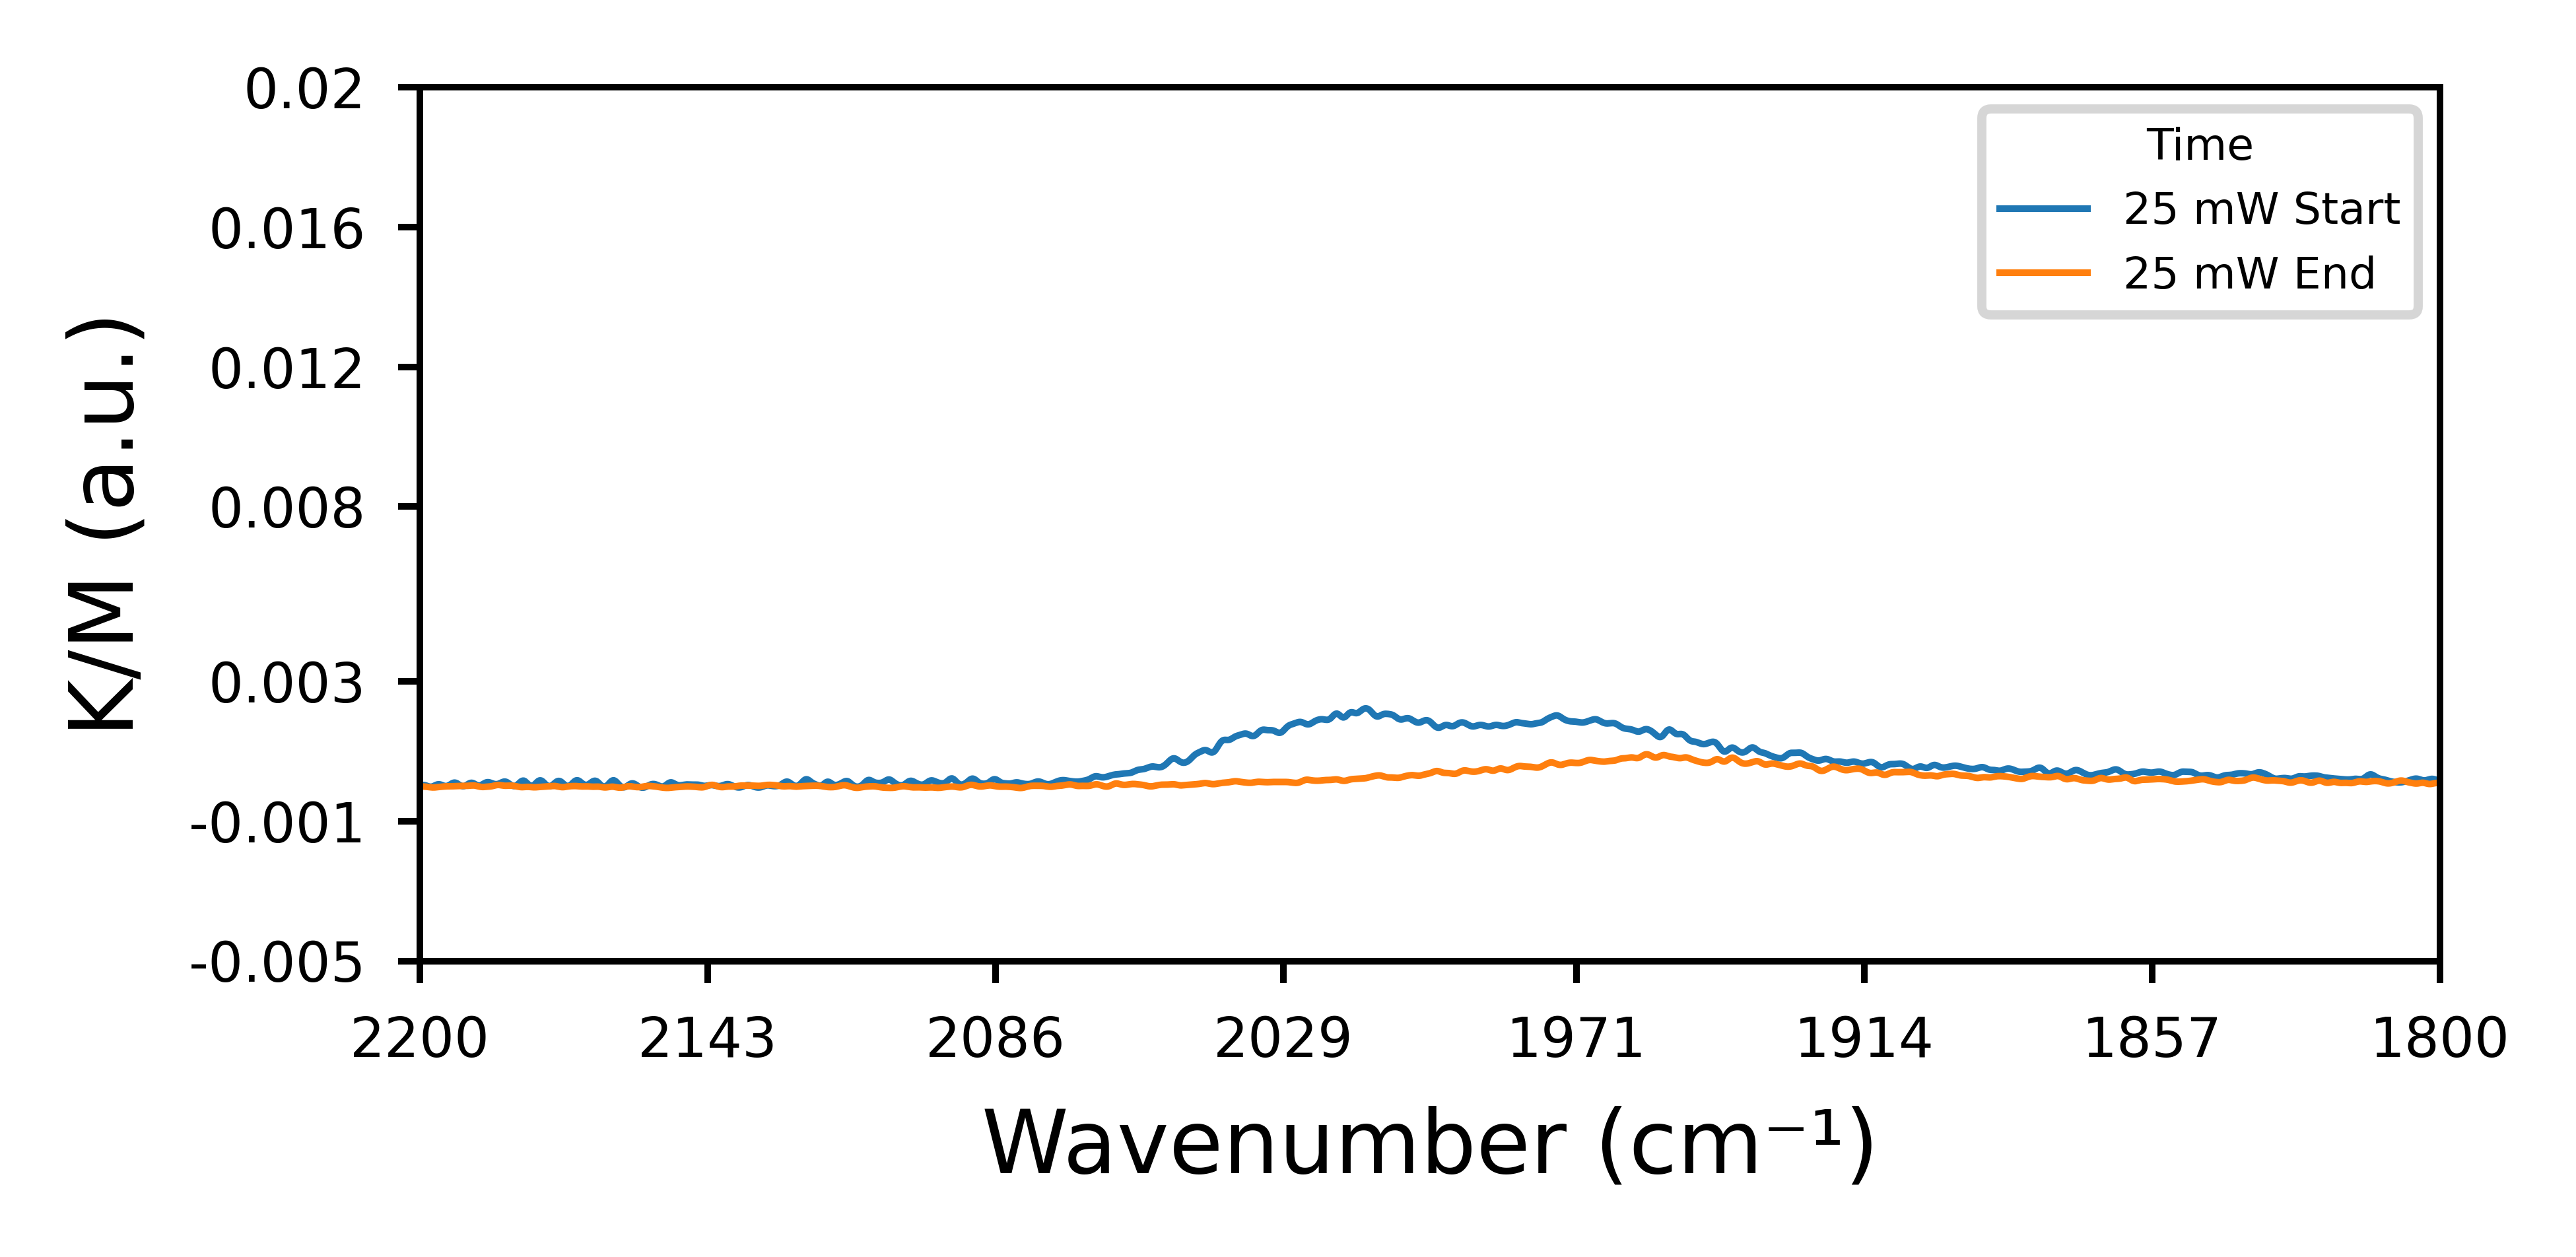

In [4]:
font_size = 1.2
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'DejaVu Sans'
fig,ax = plt.subplots(dpi=250*(1/font_size))
drift = table_for_plot.set_index('Wavenumber').plot(figsize=(4, 2), linewidth = 0.6*font_size, ax = ax)

size = fig.get_size_inches()
if size[0]<=size[1]:
    rgh_size = size[0]
else :  
    rgh_size = size[1]
fig.dpi=1000/rgh_size

plt.gca().invert_xaxis()
mpl.rcParams['pdf.fonttype'] = 42



# Axis labels

drift.set_xlabel("Wavenumber (cm" + get_super("-1") + ")", fontsize = 8*font_size,)
drift.set_ylabel("K/M (a.u.)", fontsize = 8*font_size, name = 'Helvetica')


for axis in ['bottom','left']:
    drift.spines[axis].set_linewidth(0.6*font_size)
    drift.spines[axis].set_position(("axes", 0))
for axis in ['top','right']:
    drift.spines[axis].set_visible(True)
    drift.spines[axis].set_linewidth(0.6*font_size)



#print(table_for_plot.columns[1:])
# And adjust length and tkickness of tick marks
drift.tick_params(width = 0.6*font_size, length = 2*font_size)
drift.tick_params(axis='both', which='minor', labelsize=8)
plt.xticks(fontsize=5*font_size)
plt.yticks(fontsize=5*font_size)



#plt.title('NH' + get_sub("3") + ' DRIFTS CuRu/SiO' + get_sub('2'), fontsize = 120)
#plt.title('NH' + get_sub("3") + ' DRIFTS CuRu/MgOAl' + get_sub('2') + "O" + get_sub('3'), fontsize = 120)
drift.yaxis.set_ticks_position('left')
drift.xaxis.set_ticks_position('bottom')
#Adjusting range and tick frequency of x axis
xhigh = 2200
xlow = 1800
xpoints = 8
xdigits = 0
xlabels = [round(num, xdigits) for num in np.linspace(xlow, xhigh, xpoints)]
if xdigits <= 0:
    xlabels = [int(num) for num in xlabels]

drift.set_xticks(xlabels)
drift.set_xticklabels(xlabels)
drift.set_xlim(xhigh, xlow)

yhigh = 0.02
ylow = -0.005
ypoints = 7
ydigits = 3
ylabels = [round(num,ydigits) for num in np.linspace(ylow, yhigh, ypoints)]
if ydigits <= 0:
    ylabels = [int(num) for num in ylabels]
print (ylabels)
drift.set_yticks(ylabels)
drift.set_yticklabels(ylabels)
#drift.set_yticks([])
#drift.set_yticklabels([])
drift.set_ylim(ylow, yhigh)
#drift.axes.get_yaxis().set_visible(False)
drift.legend(fontsize = 4*font_size, loc = "upper right", title = "Time", title_fontsize =4*font_size)
plt.tight_layout()
print(drift)
#Put the name you want for your figure here, it will be saved as "Fig_'Name'" with both a jpg for quick use and an eps for detailed edits.
fig_name = 'FTIR_230824_Au@SrTiO2_CO_JDN2_10_Arg10_25mW'
plt.savefig(Path.cwd() / "Plot_{}.jpg".format(fig_name), bbox_inches="tight")

plt.savefig(Path.cwd() / "Plot_{}.pdf".format(fig_name), format='pdf')
plt.show()


In [35]:
#Integrate a section: Take start and dend WN of what you want to integrate
wn1 = 1850 # Start in wn
wn2= 2050 # End in wn
wn1_df = table_for_plot.iloc[(table_for_plot['Wavenumber']-wn1).abs().argsort()[:1]].index[0]
wn2_df = table_for_plot.iloc[(table_for_plot['Wavenumber']-wn2).abs().argsort()[:1]].index[0]  
table_width = int(table_for_plot.size/len(table_for_plot))
for x in datalist:
    if x[2]:
        norm_diff = table_for_plot.loc[wn1_df:wn2_df,:].loc[:,["Wavenumber",x[0]]]
        #print(norm_diff)
        integrated_val = scipy.integrate.trapezoid(norm_diff.loc[:,x[0]], norm_diff.loc[:,"Wavenumber"])
        #table_for_plot[x[0]] = table_for_plot[x[0]] - norm_diff
        print(x[0] + " : " + str(integrated_val))
        
display(wn1_df)
display(wn2_df)

25 mW Start : 0.23421332441609688
25 mW End : 0.07869680630484154


6015

6845